<a href="https://colab.research.google.com/github/navneet058/complete_guide_of_tenserflow2/blob/main/Copy_of_CNN_with_TensorFlow_for_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import tensorflow as tf

In [36]:
print(tf.__version__)

2.5.0


In [37]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [38]:
import matplotlib.pyplot as plt

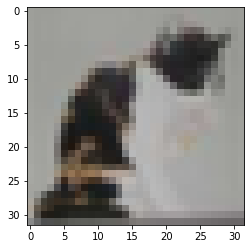

In [39]:

image = X_train[785]
plt.imshow(image)
plt.show()

In [40]:
y_train[785]

array([3], dtype=uint8)

In [41]:
X_train = X_train / 255
X_test = X_test / 255

In [42]:
model = tf.keras.Sequential(
    [
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation="relu",input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
     
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
     
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(10, activation="softmax")
]
)

In [43]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               409700    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)              

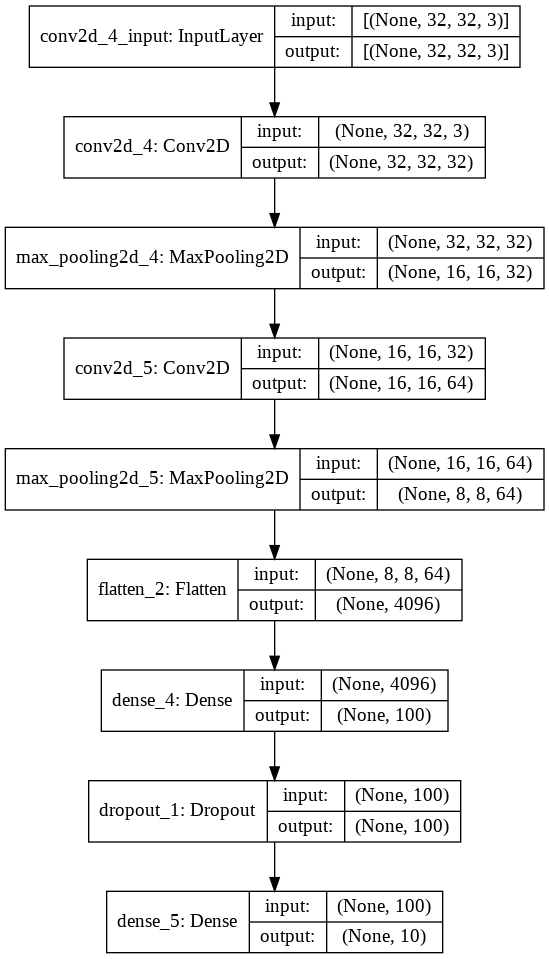

In [45]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)

In [46]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='loss',
    mode='min',
    save_best_only=True)

In [47]:
from tensorflow.keras.callbacks import EarlyStopping

In [48]:
callbacks = [
             EarlyStopping(patience=10),
             model_checkpoint_callback,

]

In [49]:
history = model.fit(X_train,y_train, epochs=1,validation_data=(X_test,y_test),callbacks=callbacks)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1563/1563 [==============================] - 12s 7ms/step - loss: 1.5596 - accuracy: 0.4353 - val_loss: 1.2314 - val_accuracy: 0.5661
INFO:tensorflow:Assets written to: /tmp/checkpoint/assets


In [50]:
loss, accuracy = model.evaluate(X_test,y_test)
print('Accuracy on test dataset:', accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 1.2314 - accuracy: 0.5661
Accuracy on test dataset: 0.566100001335144


In [51]:
predictions = model.predict(X_test)

In [52]:
import numpy as np


In [53]:
np.argmax(model.predict(X_test[60].reshape(1,32,32,3)), axis=-1)

array([7])

In [54]:
y_test[60]

array([7], dtype=uint8)

In [55]:
import pandas as pd

metrics_df = pd.DataFrame(history.history)

In [56]:
metrics_df

,loss,accuracy,val_loss,val_accuracy
0,1.559588,0.43534,1.231403,0.5661


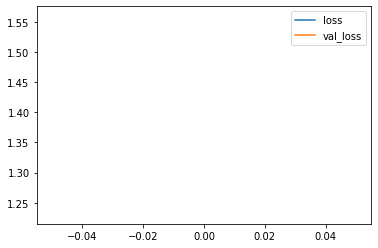

In [57]:
metrics_df[["loss","val_loss"]].plot();

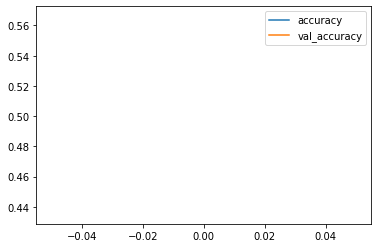

In [58]:
metrics_df[["accuracy","val_accuracy"]].plot();

In [59]:
model.save("model.h5")

In [60]:
load_saved_model = tf.keras.models.load_model("model.h5")

In [61]:
load_saved_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               409700    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)              

In [62]:
another_saved_model = tf.keras.models.load_model(checkpoint_filepath)

In [63]:
another_saved_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               409700    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)              

# Model with Batch Normalization

In [64]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [65]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [66]:
model = tf.keras.Sequential(
    [
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation="relu",input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
     
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
     
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="softmax")
]
)

In [67]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [68]:
history = model.fit(x_train,y_train, epochs=15,validation_data=(x_test,y_test),
                    callbacks=callbacks
                    )

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1563/1563 [==============================] - 12s 8ms/step - loss: 1.2051 - accuracy: 0.5809 - val_loss: 1.0632 - val_accuracy: 0.6390
INFO:tensorflow:Assets written to: /tmp/checkpoint/assets
Epoch 2/15
1563/1563 [==============================] - 12s 7ms/step - loss: 0.9289 - accuracy: 0.6787 - val_loss: 1.0656 - val_accuracy: 0.6340
INFO:tensorflow:Assets written to: /tmp/checkpoint/assets
Epoch 3/15
1563/1563 [==============================] - 12s 7ms/step - loss: 0.8187 - accuracy: 0.7150 - val_loss: 1.1105 - val_accuracy: 0.6359
INFO:tensorflow:Assets written to: /tmp/checkpoint/assets
Epoch 4/15
1563/1563 [==============================] - 12s 7ms/step - loss: 0.7418 - accuracy: 0.7419 - val_loss: 1.3237 - val_accuracy: 0.5784
INFO:tensorflow:Assets written to: /tmp/checkpoint/assets
Epoch 5/15
1563/1563 [==============================] - 12s 7ms/step - loss: 0.6817 - accuracy: 0.7617 - val_loss: 0.9176 - val_accuracy: 0.6935
INFO:tensorflow:Assets written to: /tmp/checkpoint/ass

In [69]:
loss, accuracy = model.evaluate(x_test,y_test)
print('Accuracy on test dataset:', accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 1.0942 - accuracy: 0.7022
Accuracy on test dataset: 0.7021999955177307


# Running CNN on TensorFlow in the real world

In [70]:
 !wget --no-check-certificate \
    https://namespace.co.ke/ml/dataset.zip \
    -O /tmp/catsdogs.zip

--2021-08-05 12:25:16--  https://namespace.co.ke/ml/dataset.zip
Resolving namespace.co.ke (namespace.co.ke)... 109.106.250.14
Connecting to namespace.co.ke (namespace.co.ke)|109.106.250.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228894139 (218M) [application/zip]
Saving to: ‘/tmp/catsdogs.zip’

/tmp/catsdogs.zip   100%[===================>] 218.29M  2.80MB/s    in 81s     

2021-08-05 12:26:39 (2.68 MB/s) - ‘/tmp/catsdogs.zip’ saved [228894139/228894139]



In [71]:
import os
import zipfile


In [72]:
with zipfile.ZipFile('/tmp/catsdogs.zip', 'r') as zip_ref:
    zip_ref.extractall('/tmp/cats_dogs')

In [73]:
base_dir = '/tmp/cats_dogs/dataset'
train_dir = os.path.join(base_dir, 'training_set')
test_dir = os.path.join(base_dir, 'test_set')


In [74]:
import os
os.listdir(base_dir)

['test_set', 'single_prediction', 'training_set', '.DS_Store']

In [75]:
training_set = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  seed=101,
  label_mode="binary",
  image_size=(200, 200),
  batch_size=32)

Found 8000 files belonging to 2 classes.


In [76]:
class_names = training_set.class_names


In [77]:
class_names

['cats', 'dogs']

In [78]:
validation_set = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  seed=101,
  image_size=(200, 200),
  batch_size=32)

Found 2000 files belonging to 2 classes.


In [79]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [80]:
data_augmentation = keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(200, 
                                                              200,
                                                              3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
  ]
)

In [81]:
model = Sequential([
    data_augmentation,
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),             
    Conv2D(filters=32,kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(filters=32,kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(filters=64,kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(1, activation='sigmoid')
])

In [82]:
model.compile(optimizer='adam',
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

In [ ]:
history = model.fit(training_set,validation_data=validation_set, epochs=10,callbacks=callbacks)

Epoch 1/10
250/250 [==============================] - 31s 122ms/step - loss: 0.6402 - binary_accuracy: 0.6327 - val_loss: 0.5651 - val_binary_accuracy: 0.6980


In [ ]:
import pandas as pd

metrics_df = pd.DataFrame(history.history)

In [ ]:
loss, accuracy = model.evaluate(validation_set)
print('Accuracy on test dataset:', accuracy)

In [ ]:
metrics_df[["loss","val_loss"]].plot();

In [ ]:
metrics_df[["binary_accuracy","val_binary_accuracy"]].plot();

In [ ]:
loss, accuracy = model.evaluate(validation_set)
print('Accuracy on test dataset:', accuracy)

In [ ]:
import numpy as np
from keras.preprocessing import image

In [ ]:
!wget --no-check-certificate \
    https://upload.wikimedia.org/wikipedia/commons/c/c7/Tabby_cat_with_blue_eyes-3336579.jpg \
    -O /tmp/cat.jpg

In [ ]:
test_image = image.load_img('/tmp/cat.jpg', target_size=(200, 200))


In [ ]:
test_image = image.img_to_array(test_image)


In [ ]:
test_image.shape

In [ ]:
test_image = np.expand_dims(test_image, axis=0)


In [ ]:
prediction = model.predict(test_image)


In [ ]:
prediction[0][0]

In [ ]:
if prediction[0][0]>0.5:
  print(" is a dog")
else:
   print(" is a cat")

In [ ]:
!wget --no-check-certificate \
    https://upload.wikimedia.org/wikipedia/commons/1/18/Dog_Breeds.jpg \
    -O /tmp/dog.jpg

In [ ]:
test_image2 = image.load_img('/tmp/dog.jpg', target_size=(200, 200))


In [ ]:
test_image2 = np.expand_dims(test_image2, axis=0)


In [ ]:
prediction = model.predict(test_image2)


In [ ]:
prediction[0][0]

In [ ]:
if prediction[0][0]>0.5:
  print(" is a dog")
else:
   print(" is a cat")

# Architectures

# Model without weights

In [ ]:
model = tf.keras.applications.Xception(
    include_top=True,
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

In [ ]:
model.summary()

# Model with Weights

In [ ]:
model = tf.keras.applications.Xception(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
!wget --no-check-certificate \
    https://upload.wikimedia.org/wikipedia/commons/b/b5/Lion_d%27Afrique.jpg \
    -O /tmp/lion.jpg
img_path = '/tmp/lion.jpg'
img = image.load_img(img_path, target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = tf.keras.applications.xception.preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', tf.keras.applications.xception.decode_predictions(preds, top=3)[0])

In [ ]:
x.shape